In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [88]:
df = pd.read_csv('run-student_model_distill_{}_validation-tag-epoch_acc.csv',usecols=['Value','Step'])

In [89]:
df.head()

,Step,Value
0,0,0.495818
1,1,0.639984
2,2,0.552370
3,3,0.602947
4,4,0.736360


In [90]:
df1 = pd.read_csv('run-student_model_orig_{}_validation-tag-epoch_accuracy.csv',usecols=['Value','Step'])

In [91]:
df1.rename(columns={'Value':'orig_acc'},inplace=True)

In [92]:
df.rename(columns={'Value':'distill_acc'},inplace=True)

In [93]:
df = df.merge(df1,right_on='Step',left_on='Step')

In [94]:
import seaborn as sns
sns.set()

<IPython.core.display.Javascript object>


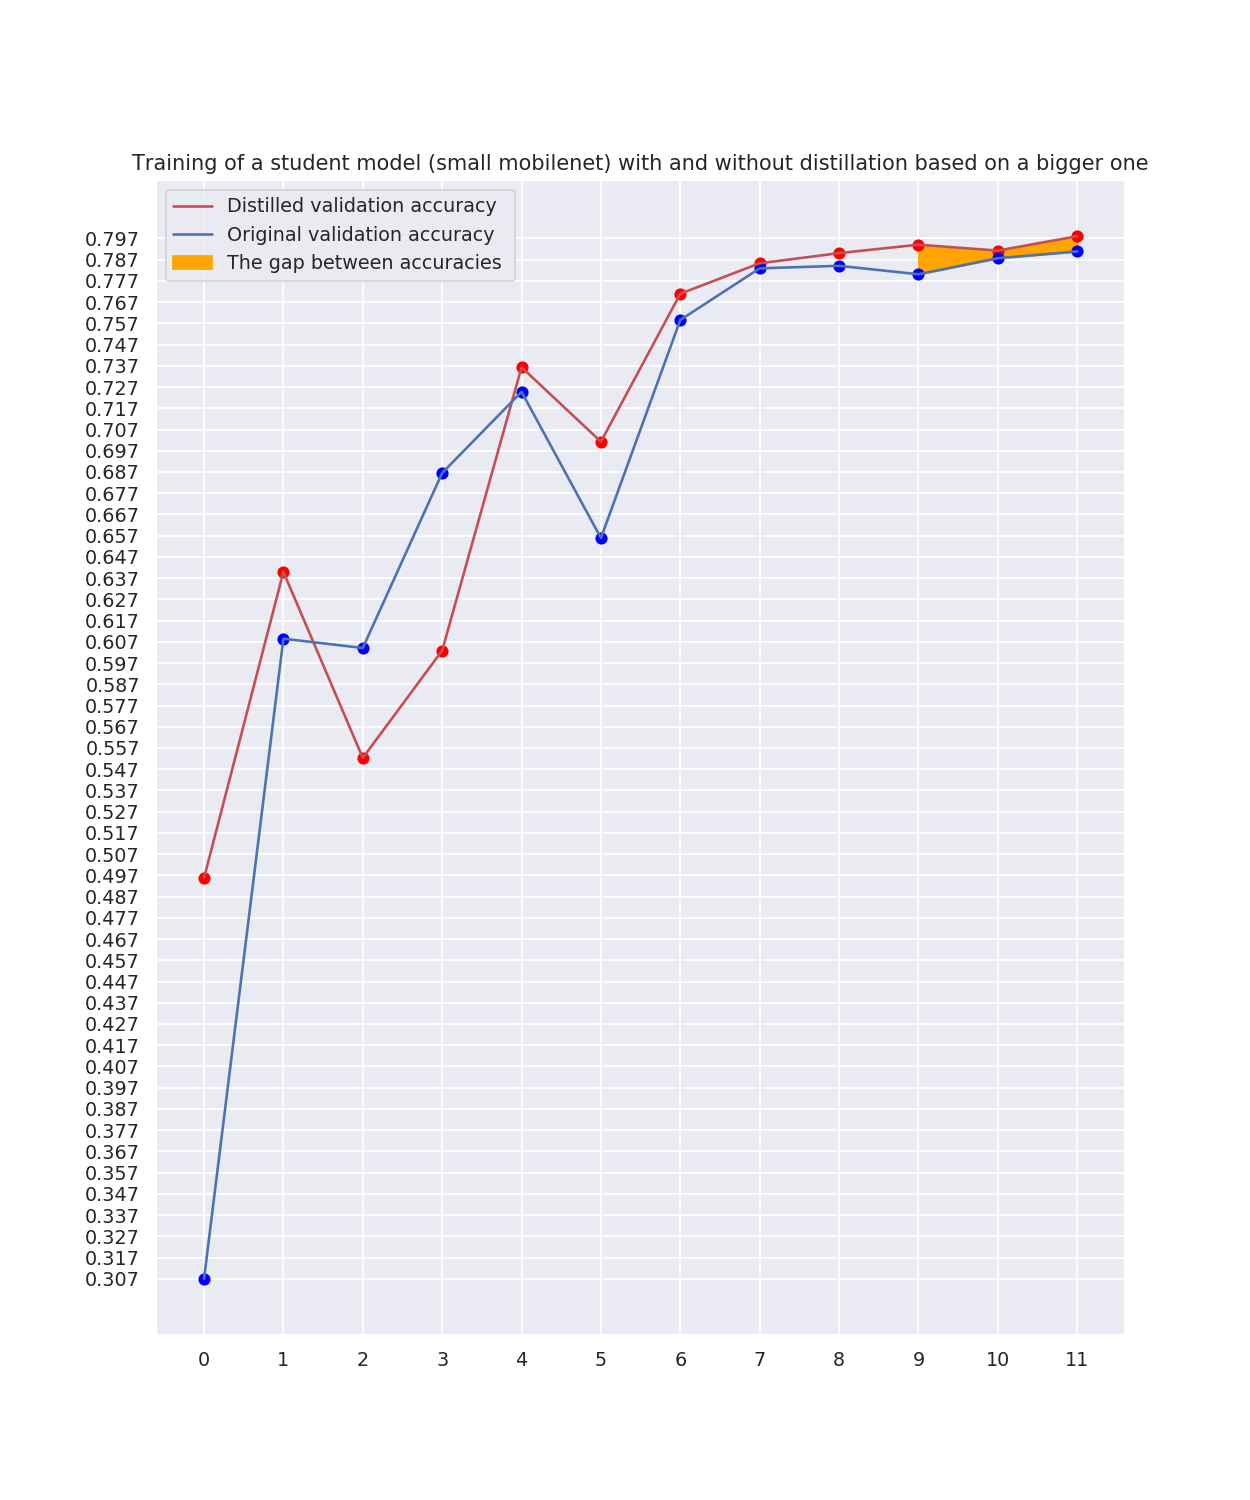

In [95]:
figure = plt.figure(figsize=(10,12))
plt.title('Training of a student model (small mobilenet) with and without distillation based on a bigger one')
plt.plot(df['Step'],df['distill_acc'], 'r', df['Step'], df['orig_acc'],'b');
plt.yticks(np.arange(min(df['orig_acc']), max(df['distill_acc']),0.01));
plt.xticks(range(0,12,1));
plt.fill_between(df['Step'][9:],df['distill_acc'][9:],df['orig_acc'][9:],color='orange');
plt.legend([ 'Distilled validation accuracy','Original validation accuracy','The gap between accuracies ']);
plt.scatter(df['Step'],df['distill_acc'], color='red');
plt.scatter(df['Step'],df['orig_acc'], color='blue');

In [96]:
figure.savefig('comparison_distill_acc.png')

In [57]:
df = pd.read_csv('run-student_model_distill_{}_validation-tag-epoch_categorical_crossentropy.csv',usecols=['Value','Step'])

In [58]:
df.head()

,Step,Value
0,0,1.493293
1,1,1.063708
2,2,1.330430
3,3,1.136866
4,4,0.760158


In [59]:
df1 = pd.read_csv('run-student_model_orig_{}_validation-tag-epoch_loss.csv',usecols=['Value','Step'])

In [61]:
df1.head()

,Step,Value
0,0,4.600372
1,1,2.222618
2,2,1.826419
3,3,1.202477
4,4,1.036233


In [62]:
df1.rename(columns={'Value':'val_loss_orig'},inplace=True)

In [63]:
df.rename(columns={'Value':'val_loss_distill'},inplace=True)

In [64]:
df = df.merge(df1,right_on='Step',left_on='Step')

In [73]:
df

,Step,val_loss_distill,val_loss_orig
0,0,1.493293,4.600372
1,1,1.063708,2.222618
2,2,1.330430,1.826419
3,3,1.136866,1.202477
4,4,0.760158,1.036233
5,5,0.854345,1.212062
6,6,0.684596,0.868550
7,7,0.667041,0.797907
8,8,0.665840,0.785807
9,9,0.641375,0.807095


<IPython.core.display.Javascript object>


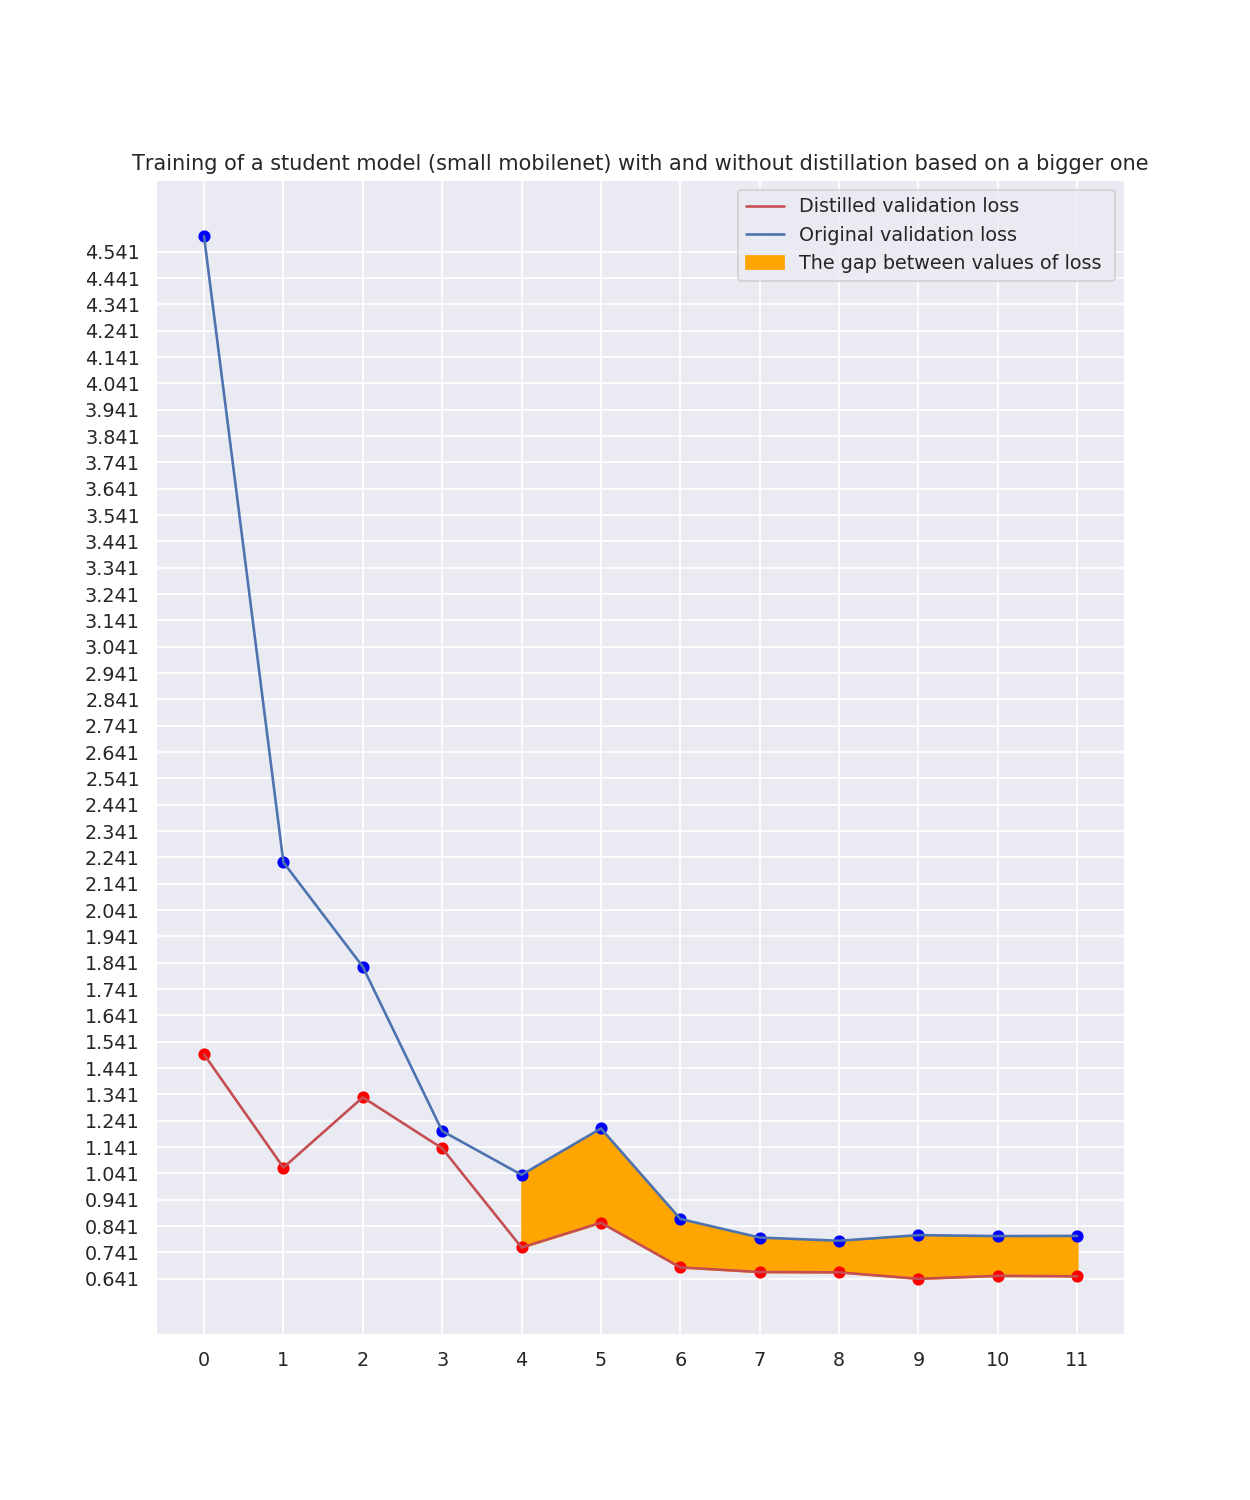

In [72]:
figure = plt.figure(figsize=(10,12))
plt.title('Training of a student model (small mobilenet) with and without distillation based on a bigger one')
plt.plot(df['Step'],df['val_loss_distill'], 'r', df['Step'], df['val_loss_orig'],'b');
plt.yticks(np.arange(min(df['val_loss_distill']), max(df['val_loss_orig']),0.1));
plt.xticks(range(0,12,1));
plt.fill_between(df['Step'][4:],df['val_loss_distill'][4:],df['val_loss_orig'][4:],color='orange');
plt.legend([ 'Distilled validation loss','Original validation loss','The gap between values of loss ']);
plt.scatter(df['Step'],df['val_loss_distill'], color='red');
plt.scatter(df['Step'],df['val_loss_orig'], color='blue');

In [74]:
figure.savefig('comparison_distill_loss.png')